Edge detection = do convolution with two kernels
"Understanding Convolutions" from River Trail documentation = github
Canny edge detection - wikipedia
match parts of image with a matrix 
Mayavi - 3d library

Populating the interactive namespace from numpy and matplotlib


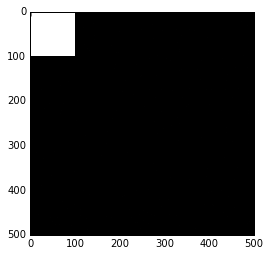

In [91]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([500,500])
random_image[0:100,0:100] = 255
plt.imshow(random_image, cmap='gray', interpolation='nearest')

('Shape:', (300L, 451L, 3L))
('Values min/max:', 0, 231)


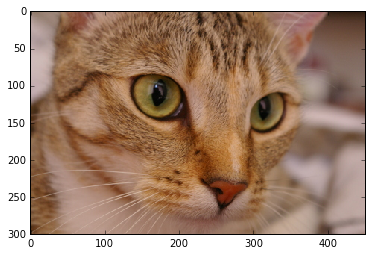

In [90]:
from skimage import data
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())
plt.imshow(cat, interpolation='nearest')

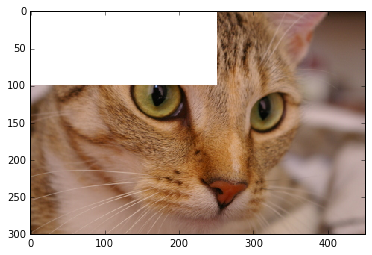

In [87]:
# Make a red square with basic array slicing
cat1 = cat.copy()
cat1[0:100, 0:251, :] = [255, 255, 255] # [red, green, blue]
plt.imshow(cat1);

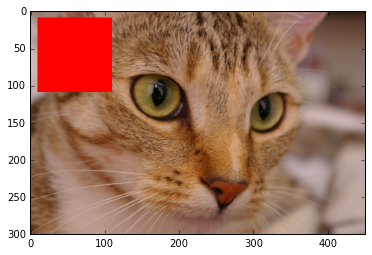

In [13]:
# Make a red square with basic array slicing
cat[10:110, 10:110, :] = [255, 0, 0] # [red, green, blue]
plt.imshow(cat);

('Linear0:', dtype('float64'), 0.0, 1.0)
('Linear1:', dtype('uint8'), 0, 255)


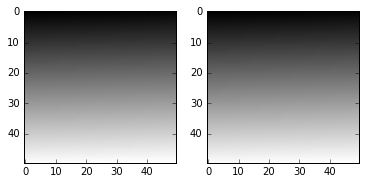

In [16]:
# can represent images as either 0-255 or 0-1 
# where 0 is black and white is 255 or 1
linear0 = np.linspace(0, 1, 2500).reshape((50,50))
linear1 = np.linspace(0,255,2500).reshape((50,50)).astype(np.uint8)
print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

In [18]:
# can convert formats. normally use float since scikit-image mostly uses
# that format internally
from skimage import img_as_float, img_as_ubyte
image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

('type, min, max:', dtype('float64'), 0.0, 0.90588235294117647)
('type, min, max:', dtype('uint8'), 0, 231)
('231/255 =', 0.9058823529411765)


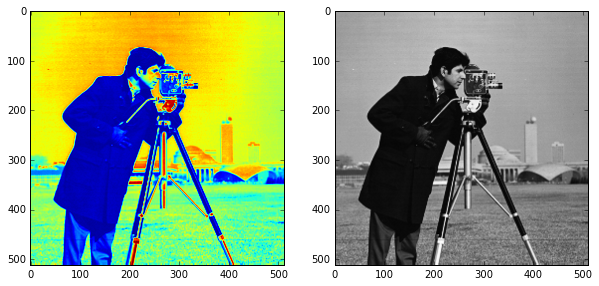

In [19]:
from skimage import data
image = data.camera()
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10,5))
ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray')

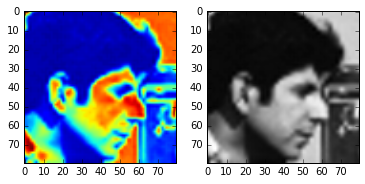

In [21]:
# zoom in on the face:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray')

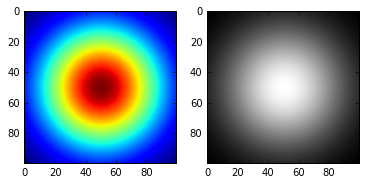

In [22]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1,2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray')

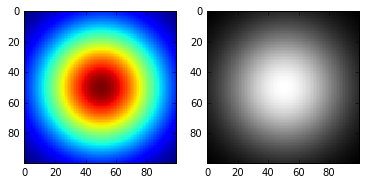

In [25]:
fig, (ax_jet, ax_gray) = plt.subplots(1,2)
ax_jet.imshow(R, cmap='jet', interpolation='nearest')
ax_gray.imshow(R, cmap='gray', interpolation='nearest')

In [26]:
# add this line at top of any script to change the default colormap:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

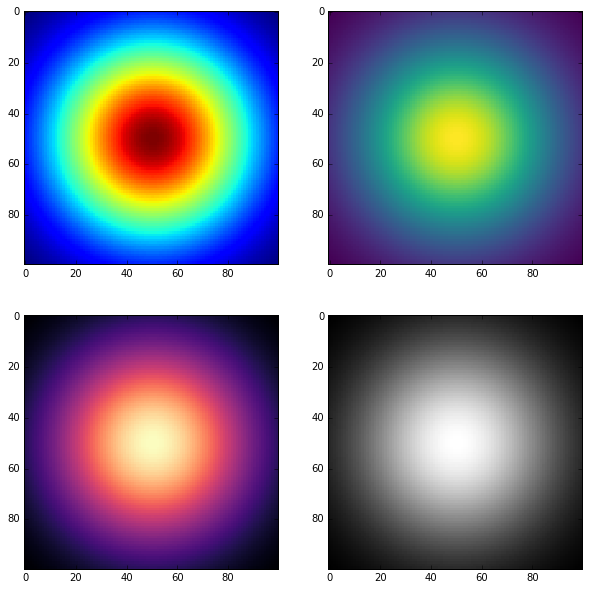

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

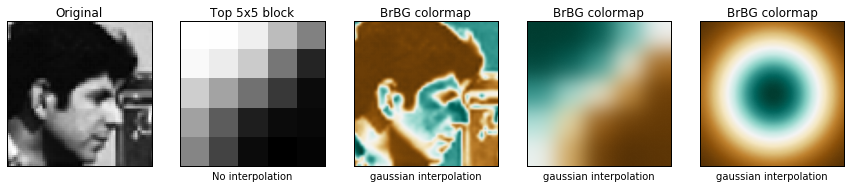

In [28]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))

    if reverse_cmap:
        cmap = cmap + '_r'

    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')

    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)

    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)

    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

<type 'numpy.ndarray'>


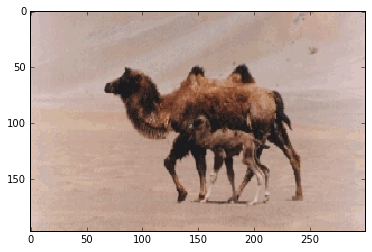

In [33]:
from skimage import io
image = io.imread('camel/camel_0003.jpg')
print(type(image))
plt.imshow(image)

In [38]:
ic = io.imread_collection('unicorn/*.jpg')
print(type(ic), '\n\n', ic)

(<class 'skimage.io.collection.ImageCollection'>, '\n\n', <skimage.io.collection.ImageCollection object at 0x000000002FB14630>)


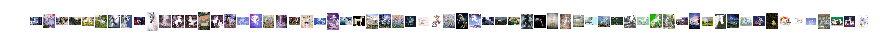

In [43]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize = (15,10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

In [67]:
# define a function to draw an H on the picture:
def draw_H(image, coords, color=(0.8,0.8,0.8), in_place=True):
    out = image.copy()
    out[:, coords[0]:coords[1], :] = [color] # [red, green, blue]
    return out

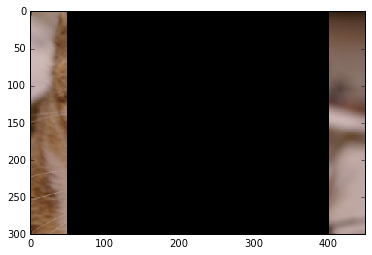

In [68]:
# testing the draw_H function:
cat = data.chelsea()
cat_H = draw_H(cat,(50,-50))
plt.imshow(cat_H);

In [69]:
# plot the intensity of each channel of the image along a given row:
def plot_intensity(image,row):
    #what am I doing wrong here?
    red_values = image[row,:,(255,0,0)]
    green_values = image[row,:,(0,255,0)]
    blue_values = image[row,:,(0,0,255)]
    
    plt.figure()
    plt.plot(red_values, 'r')
    plt.plot(green_values, 'g')
    plt.plot(blue_values, 'b')
    
    pass

In [70]:
# test our plot intensity function
plot_intensity(cat,50)
plot_intensity(cat,100)

IndexError: index 255 is out of bounds for axis 2 with size 3